NameError: name 'mnist' is not defined

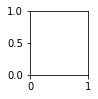

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm

mnist = fetch_mldata('MNIST original', data_home='data/mnist') # 로컬에 데이터가 없다면 직접 다운받아 주는 함수 fetch_mldata

counter = 1
for i in range(1, 4):
    for j in range(1, 6):
        plt.subplot(3, 5, counter) # counter 이용 위치 인덱싱 계속 변경해서 지정! 
        plt.imshow(mnist.data[(i - 1) * 8000 + j].reshape((28, 28)), cmap=cm.Greys_r) # i는 숫자 인덱싱 의미 즉 0은 1~8000까지 1은 8001~16000까지라 할 수 있음
        plt.axis('off')
        counter += 1
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

if __name__ == '__main__':
    X, y = mnist.data, mnist.target
    X = X/255.0*2 - 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
    
    pipeline = Pipeline([
        ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
    ])
    
    parameters = {
        'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
        'clf__C': (0.1, 0.3, 1, 3, 10, 30),
    }

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
    grid_search.fit(X_train[:10000], y_train[:10000])
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
    predictions = grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 54.0min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 101.9min finished


Best score: 0.965
Best parameters set:
	clf__C: 3
	clf__gamma: 0.01
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      1770
        1.0       0.99      0.98      0.98      1987
        2.0       0.95      0.97      0.96      1738
        3.0       0.96      0.96      0.96      1808
        4.0       0.97      0.98      0.97      1703
        5.0       0.96      0.96      0.96      1549
        6.0       0.98      0.98      0.98      1677
        7.0       0.98      0.96      0.97      1827
        8.0       0.96      0.95      0.96      1701
        9.0       0.96      0.96      0.96      1740

avg / total       0.97      0.97      0.97     17500

